In [27]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt
from sklearn import datasets
iris = datasets.load_iris()
#df = pd.read_csv('Wholesale.csv', encoding = 'unicode_escape')

In [30]:
type(iris)

sklearn.utils.Bunch

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
User Id      249 non-null object
Sports       249 non-null int64
Religious    249 non-null int64
Nature       249 non-null int64
Theatre      249 non-null int64
Shopping     249 non-null int64
Picnic       249 non-null int64
dtypes: int64(6), object(1)
memory usage: 13.7+ KB


In [31]:
X = iris.data[:, :2] # we only take the first two features.
y = iris.target

In [6]:
#y = df.Region
#X = df[['Frozen','Region']]
#X = df[['Capacity','Occupancy']]
X = df[['Region','Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [32]:
from sklearn. cluster import KMeans
km = KMeans(n_clusters = 3, init = 'random',n_init= 10,max_iter=300,tol= 1e-04, random_state=0 )
y_km = km.fit_predict(X)

In [33]:
print('Искажение : %.2f' % km.inertia_)

Искажение : 37.05


130.47526666666667
58.20409278906671
37.05070212765958
27.9902120383037
21.00466066066066
17.33982216563924
14.756476273726275
12.788763481527546
11.053846569074201
9.638851368076374
8.518402597402599
7.8053798701298716
6.952826422889117
6.416879127408541
5.993336161387633
5.397258601821296
5.042924513395103
4.733200937950939
4.505360467018364


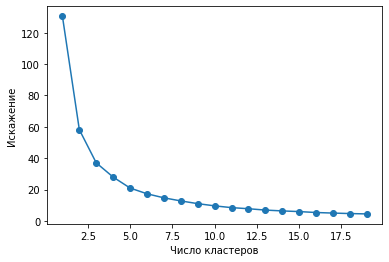

In [34]:
import numpy as np
distortions = []
for i in range(1,20):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10 , max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    print(km.inertia_)
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Чиcлo кластеров')
plt.ylabel('Искажение')
plt.show()

In [ ]:
print(y_km)

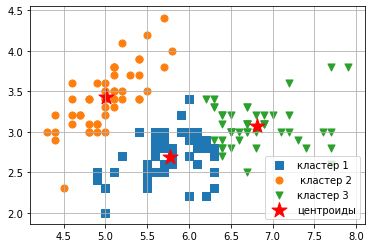

In [40]:
plt.scatter(X[y_km== 0 , 0], X[y_km == 0 , 1], s=50, marker= 's', label= 'кластер 1')
plt.scatter(X[y_km== 1 , 0] ,X[y_km == 1 , 1] ,s=50, marker='o', label = ' кластер 2 ')
plt.scatter(X[y_km== 2 , 0] ,X[y_km == 2 , 1] ,s=50, marker= 'v', label= 'кластер 3 ')
plt.scatter(km.cluster_centers_[:,0] ,km.cluster_centers_[:,1] , s=250 , marker= '*', c = 'red', label = 'центроиды')
plt.legend()
plt.grid()
plt.show()

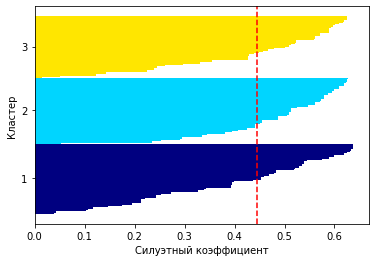

In [35]:
#Силуэтный график
km = KMeans(n_clusters= 3, init='k-means++', n_init=10, max_iter = 300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
import numpy as пр
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower , y_ax_upper = 0 , 0
yticks = []
for i , c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters) 
    plt.barh(range(y_ax_lower , y_ax_upper) ,c_silhouette_vals ,height= 1.0 ,edgecolor = 'none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle= "--")
plt.yticks(yticks , cluster_labels + 1)
plt.ylabel('Кластер')
plt.xlabel('Силуэтный коэффициент')
plt.show()

In [36]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(X, metric= 'euclidean')))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,0.538516,0.500000,0.640312,0.141421,0.500000,0.509902,0.141421,0.921954,0.447214,...,1.649242,1.843909,1.063015,1.726268,1.612452,1.676305,1.562050,1.486607,1.104536,0.943398
1,0.538516,0.000000,0.282843,0.316228,0.608276,1.029563,0.500000,0.412311,0.509902,0.100000,...,1.802776,2.002498,0.948683,1.910497,1.824829,1.800000,1.486607,1.600000,1.360147,1.000000
2,0.500000,0.282843,0.000000,0.141421,0.500000,0.989949,0.223607,0.360555,0.424264,0.223607,...,2.002498,2.202272,1.208305,2.100000,2.002498,2.009975,1.746425,1.811077,1.513275,1.216553
3,0.640312,0.316228,0.141421,0.000000,0.640312,1.131371,0.300000,0.500000,0.282843,0.300000,...,2.100000,2.300000,1.264911,2.202272,2.109502,2.102380,1.802776,1.902630,1.627882,1.303840
4,0.141421,0.608276,0.500000,0.640312,0.000000,0.500000,0.447214,0.200000,0.921954,0.509902,...,1.772005,1.964688,1.204159,1.843909,1.726268,1.802776,1.702939,1.615549,1.216553,1.081665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1.676305,1.800000,2.009975,2.102380,1.802776,1.581139,2.137756,1.746425,2.302173,1.802776,...,0.100000,0.223607,0.948683,0.223607,0.300000,0.000000,0.640312,0.200000,0.640312,0.800000
146,1.562050,1.486607,1.746425,1.802776,1.702939,1.664332,1.923538,1.581139,1.941649,1.523155,...,0.721110,0.848528,0.538516,0.860233,0.894427,0.640312,0.000000,0.538516,0.905539,0.640312
147,1.486607,1.600000,1.811077,1.902630,1.615549,1.421267,1.941649,1.552417,2.102380,1.603122,...,0.223607,0.412311,0.761577,0.360555,0.360555,0.200000,0.538516,0.000000,0.500000,0.600000
148,1.104536,1.360147,1.513275,1.627882,1.216553,0.943398,1.600000,1.200000,1.868154,1.334166,...,0.583095,0.761577,0.806226,0.632456,0.509902,0.640312,0.905539,0.500000,0.000000,0.500000


In [37]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(X, metric= 'euclidean'), method= 'complete')

In [38]:
pd. DataFrame(row_clusters,columns= [ ' метка строки 1 ',' метка строки 2 ', 'расстояние' ,' число элементов в класт.' ] ,
              index= [' кластер %d ' %(i + 1 ) for i in range (row_clusters.shape[0])])

,метка строки 1,метка строки 2,расстояние,число элементов в класт.
кластер 1,0.0,17.0,0.000000,2.0
кластер 2,2.0,29.0,0.000000,2.0
кластер 3,5.0,16.0,0.000000,2.0
кластер 4,11.0,24.0,0.000000,2.0
кластер 5,7.0,26.0,0.000000,2.0
...,...,...,...,...
кластер 145,267.0,290.0,1.414214,58.0
кластер 146,283.0,293.0,1.649242,50.0
кластер 147,292.0,294.0,2.256103,88.0
кластер 148,295.0,296.0,2.707397,138.0


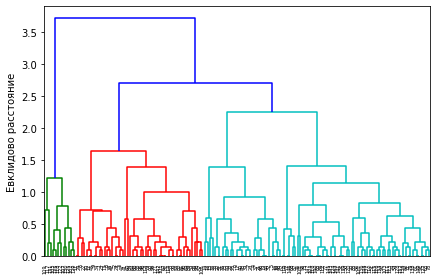

In [39]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Евклидово расстояние')
plt.show()

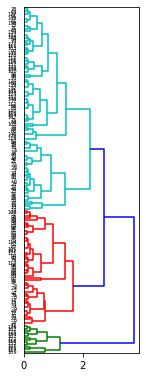

In [43]:
# fig = plt.figure(figsize= (8, 8), facecolor= 'white' )
# axd = fig.add_axes( [0.09, 0.1, 0.2, 0.6] )
# row_dendr = dendrogram(row_clusters , orientation= 'right' )

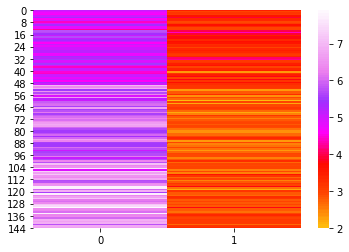

In [60]:
import seaborn as sns
heatmap_plot = sns.heatmap(X, center=0, cmap='gist_ncar')
plt.show()

In [57]:
# df_rowclust = X.iloc[row_dendr['leaves'][::-1]]

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
# axm = fig.add_axes([0.23 , 0.1, 0.6, 0.6])
# сах = axm.matshow(df_rowclust, interpolation='nearest', cmap = 'hot_r')

In [ ]:
# axd.set_xticks([])
# axd.set_yticks([])
# for i iп axd.spines.values():
#     i.set_visiЬle(False)
# fig.colorbar(сах)
# axm.set_xticklabels([' '] + list(df_rowclust.columпs))
# axm.set_yticklabels([' '] + list(df_rowclust.index))
# plt.show()

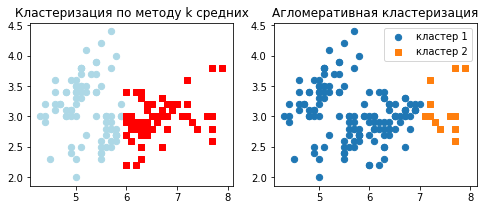

In [94]:
from sklearn.cluster import AgglomerativeClustering
f, (ax1 , ax2) = plt.subplots(1 , 2, figsize=(8 , 3))
km = KMeans (n_clusters = 2 ,random_state=0 )
y_km = km.fit_predict(X)
ax1.scatter(X[y_km== 0 , 0], X[y_km== 0 , 1], c='lightblue',marker= 'o',s=40,label= 'кластер 1')
ax1.scatter(X[y_km== 1 , 0] ,X[y_km== 1 , 1],c= 'red',marker ='s',s=40 ,label= 'кластер 2')
ax1.scatter(X[y_km== 1 , 0] ,X[y_km== 1 , 1],c= 'red',marker ='s',s=40 ,label= 'кластер 3')
ax1.set_title('Кластеризация по методу k средних')
ac= AgglomerativeClustering(n_clusters=2 ,affinity= 'euclidean',linkage= 'complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0 , 0] ,X[у_ас==0 , 1] ,s=40 ,label= 'кластер 1')
ax2.scatter(X[y_ac==1 , 0] ,X[y_ac==1 , 1] ,marker= 's' ,s=40 ,label= 'кластер 2')
ax2.set_title('Агломеративная кластеризация')
plt.legend()
plt.show()

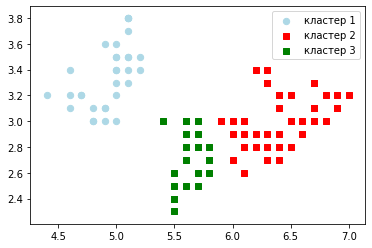

In [117]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,min_samples=5 ,metric= 'euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0 , 0 ], X[y_db== 0,1] ,c='lightblue',marker= 'o',s=40,label= 'кластер 1')
plt.scatter(X[y_db == 1, 0 ], X[y_db== 1 , 1] ,c='red',marker='s',s=40 ,label='кластер 2')
plt.scatter(X[y_db == 2, 0 ], X[y_db== 2 , 1] ,c='green',marker='s',s=40 ,label='кластер 3')
plt.legend()
plt.show()